<a href="https://colab.research.google.com/github/Fadelhamkaa/ML-KNN/blob/main/LP5_Muhammad_Fadel_Hamka_60200122116_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, classification_report, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_digits

# Load the digits dataset
digits = load_digits()

# Konversi data menjadi DataFrame
data = pd.DataFrame(digits.data, columns=digits.feature_names)
data['target'] = digits.target

data

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [3]:
# Memisahkan data menjadi fitur (X) dan target (y)
X = data.drop(columns='target')  # Fitur (semua kolom kecuali target)
y = data['target']  # Target (kolom 'target')

# Membagi data menjadi data latih (training) dan data uji (testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ***VISUALISASI KLASIFIKASI***

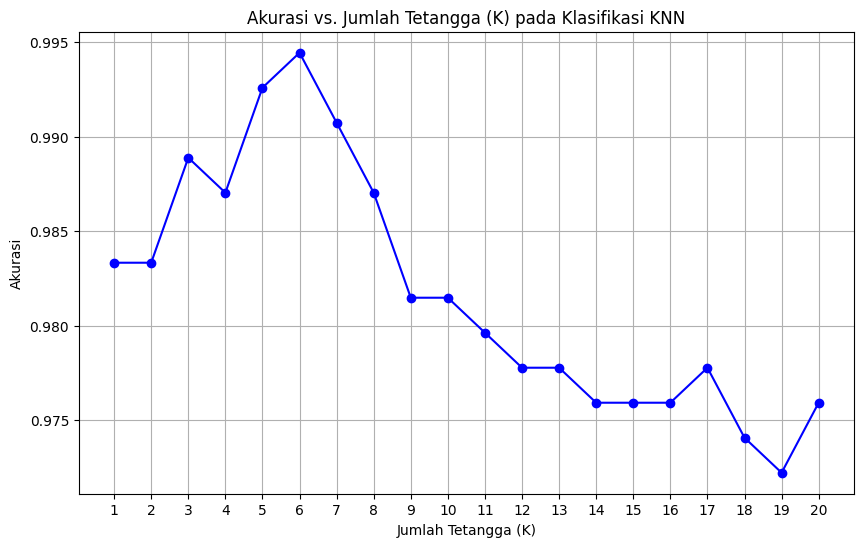

In [4]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Menyimpan akurasi untuk setiap nilai K
k_values = list(range(1, 21))  # K dari 1 hingga 20
accuracy_results = []

# Melakukan percobaan untuk setiap nilai K
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)  # Untuk klasifikasi
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results.append(accuracy)

# Visualisasi akurasi untuk setiap nilai K pada klasifikasi
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_results, marker='o', color='b', linestyle='-', markersize=6)
plt.title("Akurasi vs. Jumlah Tetangga (K) pada Klasifikasi KNN")
plt.xlabel("Jumlah Tetangga (K)")
plt.ylabel("Akurasi")
plt.grid(True)
plt.xticks(k_values)  # Menampilkan label K pada sumbu x
plt.show()

# ***VIUSALISASI REGRESI***

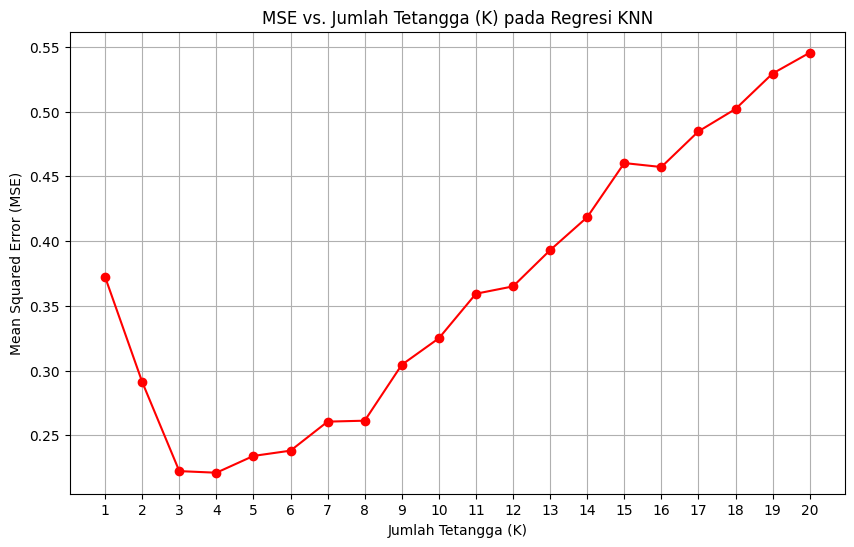

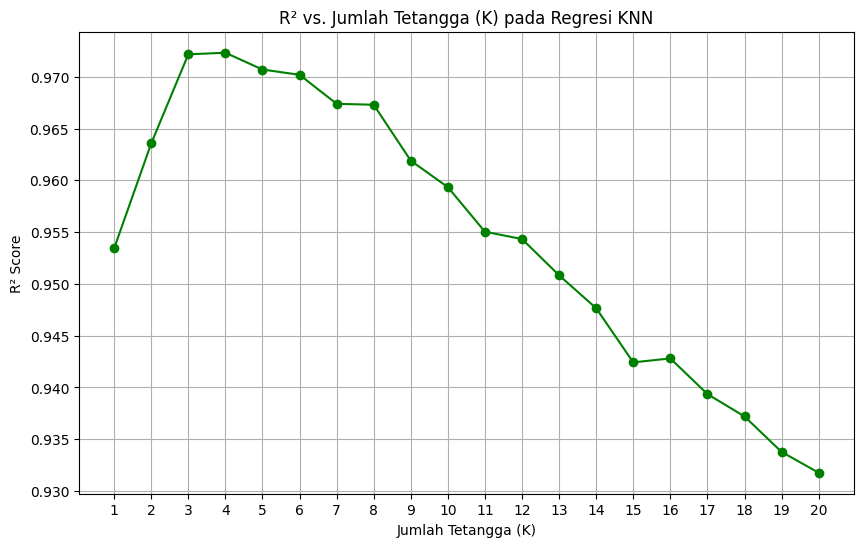

In [5]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor

# Menyimpan MSE dan R² untuk setiap nilai K
mse_results = []
r2_results = []

# Melakukan percobaan untuk setiap nilai K
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)  # Untuk regresi
    y_pred = knn.predict(X_test)

    # Menghitung MSE dan R²
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mse_results.append(mse)
    r2_results.append(r2)

# Visualisasi MSE vs. Jumlah Tetangga (K) pada regresi
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_results, marker='o', color='r', linestyle='-', markersize=6)
plt.title("MSE vs. Jumlah Tetangga (K) pada Regresi KNN")
plt.xlabel("Jumlah Tetangga (K)")
plt.ylabel("Mean Squared Error (MSE)")
plt.grid(True)
plt.xticks(k_values)  # Menampilkan label K pada sumbu x
plt.show()

# Visualisasi R² vs. Jumlah Tetangga (K) pada regresi
plt.figure(figsize=(10, 6))
plt.plot(k_values, r2_results, marker='o', color='g', linestyle='-', markersize=6)
plt.title("R² vs. Jumlah Tetangga (K) pada Regresi KNN")
plt.xlabel("Jumlah Tetangga (K)")
plt.ylabel("R² Score")
plt.grid(True)
plt.xticks(k_values)  # Menampilkan label K pada sumbu x
plt.show()

# ***2. a. Classification Report***

In [6]:
# Tentukan nilai K terbaik dan terburuk
best_k = 6  # Gantilah dengan nilai K terbaik dari hasil eksperimen
worst_k = 19  # Gantilah dengan nilai K terburuk dari hasil eksperimen

# Mengimpor modul yang diperlukan
from sklearn.metrics import classification_report

# Mengimplementasikan model dengan K terbaik
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)

# Mengimplementasikan model dengan K terburuk
knn_worst = KNeighborsClassifier(n_neighbors=worst_k)
knn_worst.fit(X_train, y_train)
y_pred_worst = knn_worst.predict(X_test)

# Laporan klasifikasi untuk K terbaik
print("Laporan Klasifikasi untuk K Terbaik:")
print(classification_report(y_test, y_pred_best))

# Laporan klasifikasi untuk K terburuk
print("Laporan Klasifikasi untuk K Terburuk:")
print(classification_report(y_test, y_pred_worst))

Laporan Klasifikasi untuk K Terbaik:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        47
           3       0.98      1.00      0.99        54
           4       0.98      1.00      0.99        60
           5       0.99      1.00      0.99        66
           6       1.00      1.00      1.00        53
           7       1.00      1.00      1.00        55
           8       1.00      1.00      1.00        43
           9       1.00      0.95      0.97        59

    accuracy                           0.99       540
   macro avg       1.00      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540

Laporan Klasifikasi untuk K Terburuk:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        53
           1       0.94      0.98      0.96        50
   

# ***2. b. Confusion Matrix***

Confusion Matrix untuk K Terbaik:


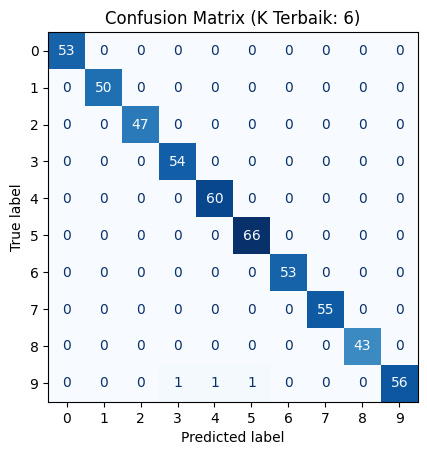

Confusion Matrix untuk K Terburuk:


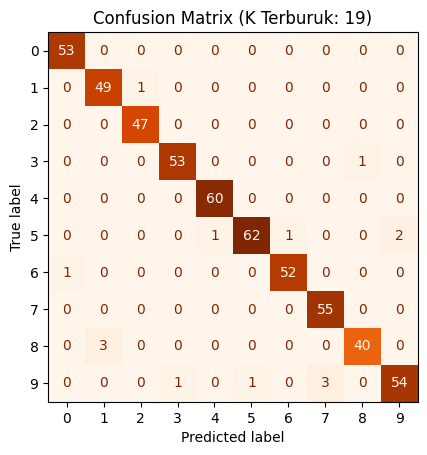

In [7]:
# ====== Visualisasi Confusion Matrix untuk K Terbaik dan Terburuk ======
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion Matrix untuk K terbaik
print("Confusion Matrix untuk K Terbaik:")
disp_best = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_best, cmap='Blues', colorbar=False)
plt.title(f"Confusion Matrix (K Terbaik: {best_k})")
plt.show()

# Confusion Matrix untuk K terburuk
print("Confusion Matrix untuk K Terburuk:")
disp_worst = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_worst, cmap='Oranges', colorbar=False)
plt.title(f"Confusion Matrix (K Terburuk: {worst_k})")
plt.show()

# ***2. c. MSE & R2Score***

In [8]:
# ====== Menghitung dan Menampilkan MSE & R2 Score ======
from sklearn.metrics import mean_squared_error, r2_score

# Menghitung MSE dan R2 Score untuk K terbaik
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

# Menghitung MSE dan R2 Score untuk K terburuk
mse_worst = mean_squared_error(y_test, y_pred_worst)
r2_worst = r2_score(y_test, y_pred_worst)

# Menampilkan hasil MSE dan R2 Score
print(f"MSE untuk K Terbaik ({best_k}): {mse_best}")
print(f"R2 Score untuk K Terbaik ({best_k}): {r2_best}")

print(f"MSE untuk K Terburuk ({worst_k}): {mse_worst}")
print(f"R2 Score untuk K Terburuk ({worst_k}): {r2_worst}")

MSE untuk K Terbaik (6): 0.1425925925925926
R2 Score untuk K Terbaik (6): 0.9821591312809899
MSE untuk K Terburuk (19): 0.5685185185185185
R2 Score untuk K Terburuk (19): 0.9288682247177127


# ***4. K Terbaik dengan Perbandingan Jarak yang Berbeda***

In [9]:
# ====== Kode untuk Nomor 4 ======
# Implementasi K terbaik dengan berbagai jarak: Euclidean, Manhattan, Minkowski dengan p=1, p=3

# Daftar metrik jarak yang akan digunakan
distances = ['euclidean', 'manhattan', 'minkowski']
p_values = [2, 1, 3]  # None untuk Euclidean, 1 untuk Manhattan, 3 untuk Minkowski dengan p=3
results = []  # Untuk menyimpan hasil setiap metrik jarak

# Iterasi untuk setiap metrik jarak
for i, distance in enumerate(distances):
    # Tentukan p untuk Minkowski, None untuk Euclidean, 1 untuk Manhattan
    p_value = p_values[i]

    # Menggunakan KNN dengan metrik jarak tertentu
    knn = KNeighborsClassifier(n_neighbors=best_k, metric=distance, p=p_value)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    # Menghitung akurasi, MSE, dan R2 Score
    acc = knn.score(X_test, y_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Menyimpan hasil dalam bentuk tuple
    results.append((distance, p_value, acc, mse, r2))

# Membuat DataFrame untuk menampilkan hasil
distance_comparison = pd.DataFrame(results, columns=['Metrik Jarak', 'p Value', 'Akurasi', 'MSE', 'R2 Score'])

# Menampilkan hasil dalam bentuk tabel
print(distance_comparison)

  Metrik Jarak  p Value   Akurasi       MSE  R2 Score
0    euclidean        2  0.994444  0.142593  0.982159
1    manhattan        1  0.981481  0.520370  0.934892
2    minkowski        3  0.990741  0.235185  0.970574


## ***5. Hasil perbandingan penentuan jarak pada KNN menggunakan berbagai metrik jarak (Euclidean, Manhattan, Minkowski):***


1. **Akurasi**:
   - Akurasi mengukur seberapa sering model membuat prediksi yang benar pada data uji. Semakin tinggi nilai akurasi, semakin baik model dalam melakukan klasifikasi.
   - Dengan menggunakan **Euclidean distance**, model kemungkinan besar akan memberikan hasil akurasi yang baik pada data yang memiliki hubungan linier atau distribusi normal. Metrik ini lebih sensitif terhadap variabel yang memiliki skala besar, sehingga preprocessing seperti normalisasi atau standar sering kali diperlukan.
   - **Manhattan distance** (juga dikenal sebagai jarak kota blok) akan memberikan hasil yang baik pada data yang memiliki hubungan lebih linear dalam arah dimensi individu. Metrik ini tidak terlalu dipengaruhi oleh nilai ekstrem dan lebih cocok untuk data dengan perbedaan skala yang lebih besar antar fitur.
   - **Minkowski distance** adalah generalisasi dari Euclidean dan Manhattan yang bergantung pada parameter p. Jika p = 1, ini akan setara dengan Manhattan, dan jika p = 2, ini akan setara dengan Euclidean. Pemilihan p yang tepat dapat mempengaruhi hasil yang diperoleh, tetapi cenderung memberikan performa yang serupa dengan kedua metrik lainnya jika p dipilih dengan hati-hati.

2. **Mean Squared Error (MSE)**:
   - MSE mengukur seberapa besar kesalahan prediksi (perbedaan antara nilai prediksi dan nilai sebenarnya). Nilai MSE yang lebih kecil menunjukkan bahwa model lebih baik dalam memprediksi data.
   - Metrik jarak yang lebih cocok untuk data dengan distribusi non-linier atau data yang memiliki banyak noise dapat menyebabkan **MSE lebih rendah**. Misalnya, pada kasus data dengan banyak variabel yang saling berhubungan linier, Euclidean mungkin menghasilkan kesalahan yang lebih kecil dibandingkan dengan Manhattan.
   - **Manhattan distance** cenderung lebih tahan terhadap outliers, sehingga MSE-nya mungkin sedikit lebih tinggi jika dibandingkan dengan Euclidean pada data yang memiliki banyak titik pencilan (outliers).
   - **Minkowski distance** dengan p yang lebih kecil cenderung mengurangi sensitivitas terhadap jarak yang sangat jauh (outliers) dan menghasilkan MSE yang lebih rendah.

3. **R² Score**:
   - R² Score adalah metrik yang menunjukkan seberapa baik model mengukur varians dari data uji yang dapat dijelaskan oleh model. Nilai R² yang lebih tinggi menunjukkan bahwa model lebih baik dalam menjelaskan variansi dalam data.
   - **Euclidean distance** mungkin menghasilkan **R² yang lebih tinggi** pada data dengan hubungan linear atau distribusi normal, karena metrik ini cocok untuk data yang terdistribusi secara alami di ruang Euclidean.
   - **Manhattan distance** sering kali menghasilkan **R² yang lebih rendah** pada data dengan banyak hubungan non-linier karena pengaruhnya yang lebih kecil terhadap jarak antara dua titik. Namun, ini tidak selalu buruk, karena dapat menunjukkan bahwa model lebih sederhana dan tidak terlalu dipengaruhi oleh noise.
   - **Minkowski distance**, tergantung pada parameter p yang dipilih, dapat memberikan hasil yang lebih fleksibel, tetapi cenderung memberikan **R² yang lebih rendah** dibandingkan dengan Euclidean untuk sebagian besar kasus.

### Kesimpulan:
- **Euclidean distance** mungkin lebih baik dalam kasus data yang memiliki hubungan linier dan normal, dan dapat menghasilkan akurasi yang lebih tinggi, MSE lebih rendah, dan R² lebih tinggi.
- **Manhattan distance** lebih tahan terhadap outliers dan data dengan distribusi yang lebih "keras" (non-linier), tetapi sering kali menghasilkan MSE yang lebih tinggi dan R² yang lebih rendah dibandingkan Euclidean.
- **Minkowski distance** menawarkan fleksibilitas yang lebih tinggi, namun hasilnya sangat bergantung pada nilai parameter p. Ini dapat memberikan hasil yang lebih baik atau lebih buruk tergantung pada sifat data yang digunakan.

Untuk memilih metrik jarak yang tepat, penting untuk mempertimbangkan karakteristik data dan tujuan model (seperti klasifikasi vs. regresi).



--------



In [10]:
# Informasi tentang dataset
print(data.info())  # Untuk informasi tipe data dan jumlah baris
print(data.describe())  # Untuk statistik deskriptif
print(data.head())  # Untuk melihat 5 baris pertama dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

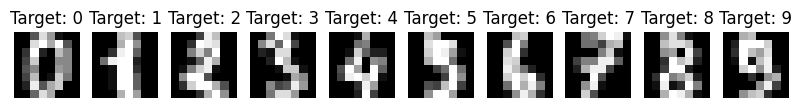

In [11]:
import matplotlib.pyplot as plt

# Menampilkan beberapa sampel gambar
fig, axes = plt.subplots(1, 10, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f'Target: {digits.target[i]}')
    ax.axis('off')
plt.show()


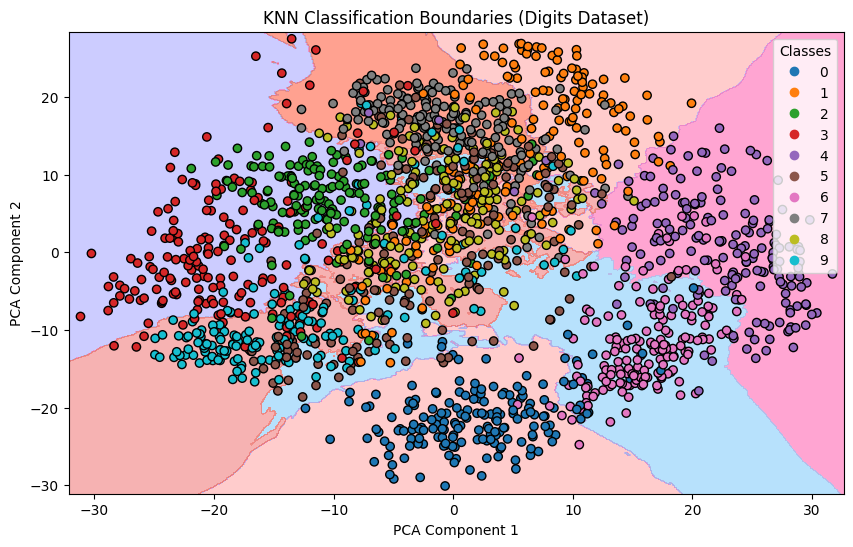

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

# Load the digits dataset
digits = load_digits()
X, y = digits.data, digits.target

# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Fit a KNN classifier
knn = KNeighborsClassifier(n_neighbors=15, weights='uniform')
knn.fit(X_reduced, y)

# Create a mesh grid for decision boundaries
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict on the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create color maps
colors = ['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFD700', '#FF69B4',
          '#87CEFA', '#9370DB', '#FF6347', '#00FA9A', '#F08080']
cmap_background = ListedColormap(colors[:len(np.unique(y))])

# Plot decision boundaries
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.6, cmap=cmap_background)

# Plot the dataset
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, edgecolor='k', cmap='tab10')
plt.title("KNN Classification Boundaries (Digits Dataset)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(*scatter.legend_elements(), title="Classes", loc='upper right')
plt.show()